# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [98]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy import stats

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Question 1

**Explain how you solve the model**

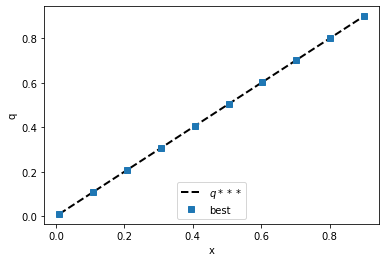

In [99]:
# Defining the utility function
def utility(z):
    return z**(1+v)/(1+v)

# Defining the expected utility if no insurance
def exp_value_noins(x,y,p):
    return p*utility(y-x)+(1-p)*utility(y)

# Defining the expected utility if insured 
def exp_value_ins(x,y,p,q):
    return p*utility(y-x+q-p*q)+(1-p)*utility(y-p*q)

# Defining the the objective function which should be optimized. Running a loop for each x to find the corresponding optimal q*
def Q1obj(x_vec,y,p):
    for i, x in enumerate(x_vec):
        obj = lambda q: -exp_value_ins(x,y,p,q)
        res = optimize.minimize_scalar(obj,bounds=(0,x),method = 'bounded')
        q[i] = res.x



# Defining parameters used for question 1
v = -2
y = 1
p = 0.2
N = 10 # N is the number of 'checks' we make for each x and q
x_vec = np.linspace(0.01,0.9,N) #x_vec is defined as range between 0.01 and 0.9 with N (10) evenly spaced values
q = np.empty(x_vec.size)

Q1obj(x_vec,y,p)
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
 
ax.plot(x_vec,q,ls='--',lw=2,color='black',label='$q***$')
ax.plot(x_vec,q,ls='',marker='s',label='best')
 
ax.set_xlabel('x')
ax.set_ylabel('q')
ax.legend(loc='lower center',frameon=True);

## Question 2

Explain your code and procedure

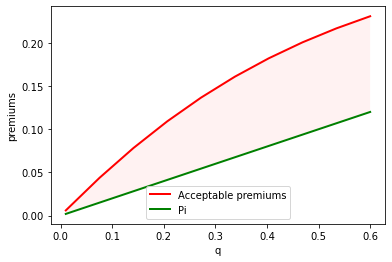

In [100]:
# The expected utility when insured now takes PI as an variable and not a function of p and q.
def exp_value_ins(pi,x,y,p,q):
    return p*utility(y-x+q-pi)+(1-p)*utility(y-pi)
 
# If the agent should be indifferent between insurance and not, the difference between expected utility when insured and not should be zero
def diff(pi,q):
    return np.absolute(exp_value_ins(pi,x,y,p,q)-exp_value_noins(x,y,p))

# Finding the corresponding PI that ensures indifference for each q.
def Q2obj(pi_vec):
    for i,q in enumerate(q2_vec):
        obj = lambda pi: diff(pi,q)
        res = optimize.minimize_scalar(obj,bounds=(0,q),method = 'bounded')
        pi_vec[i] = res.x


# Parameters for question 2
x = 0.6
q2_vec = np.linspace(0.01,0.6,N)
pi_vec = np.empty(q2_vec.size)
pi = p*q2_vec

Q2obj(pi_vec)
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
 
ax.plot(q2_vec,pi_vec,ls='-',lw=2,color='red',label='Acceptable premiums')
ax.plot(q2_vec,pi,ls='-',lw=2,color='green',label='Pi')
ax.fill_between(q2_vec, pi, pi_vec, facecolor="red", alpha=0.05)
 
ax.set_xlabel('q')
ax.set_ylabel('premiums')
ax.legend(loc='lower center',frameon=True);

## Question 3

Explain your code and procedure

In [101]:
# Parameters for question 3

a = 2
b = 7
N = 10**5

# Defining the montecarlo function which returns the mean of 10.000 draws from the beta distribution of x
def montecarlo(a,b,N,gamma,pi):
    x = np.random.beta(a,b,N)
    return np.mean(utility(y-(1-gamma)*x-pi))

# Defining the two insurance schemes
ins1 = montecarlo(a,b,N,gamma = 0.9, pi = 0.2)
ins2 = montecarlo(a,b,N,gamma = 0.45, pi = 0.1)

# Comparing the two insurance schemes
if ins1 > ins2:
    print(f'The first insurance policy is preferable and yields a value of {ins1:.5f}')
else:
    print(f'The second insurance policy is preferable and yields a value of {ins2:.5f}')

The first insurance policy is preferable and yields a value of -1.28604


## Question 4

In [106]:
#Definition of value of montecarlo draws from Question 3 just renamed for insured agent
def montecarlo_ins(a,b,N,gamma,pi):
    x = np.random.beta(a,b,N)
    return np.mean(utility(y-(1-gamma)*x-pi))
 
#Value of montecarlo draws for uninsured agent
def montecarlo_noins(a,b,N,gamma,pi):
    x = np.random.beta(a,b,N)
    return np.mean(utility(y-x))
 
gamma = 0.95
#Objective obj is absolute value of difference between value for insured and uninsured agent
obj = lambda pi: np.absolute((montecarlo_ins(a,b,N,gamma,pi)-montecarlo_noins(a,b,N,gamma,pi)))
#Optimize with guess = 0.1
res = optimize.root(obj,0.1,method='broyden1')
pi = res.x
print(f'Profit maximizing premium is : {pi:.5f}')

Profit maximizing premium is : 0.23866
